### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Pima Indians
Source: https://www.kaggle.com/mehdidag/pima-indians

1. pregnant - It represents the number of times the woman got pregnant during her life. 

2. glucose - It represents the plasma glucose concentration at 2 hours in an oral glucose tolerance test. 

3. diastolic - The blood pressure is a very well-known way to measure the health of the heart of a person, there are too measure in fact, the diastolic and the systolic. In this data set, we have the diastolic which is in the fact the pressure in (mm/Hg) when the heart relaxed after the contraction.  

4. triceps - It is a value used to estimate body fat (mm) which is measured on the right arm halfway between the olecranon process of the elbow and the acromial process of the scapula.  

5. insulin - It represents the rate of insulin 2 hours serum insulin (mu U/ml).  

6. bmi - It represents the Body Mass Index (weight in kg / (height in meters squared), and is an indicator of the health of a person.  

7. diabetes - It is an indicator of history of diabetes in the family.   

8. age - It represents the age in years of the Pima’s woman.   

9. test - It can take only 2 values (‘negatif’ or ‘positif’) and represents if the patient shows signs of diabetes.

In [3]:
diabetes_data = pd.read_csv('dataset/PimaIndians.csv')

diabetes_data.head(10)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,negatif
1,0,137,40,35,168,43.1,2.288,33,positif
2,3,78,50,32,88,31.0,0.248,26,positif
3,2,197,70,45,543,30.5,0.158,53,positif
4,1,189,60,23,846,30.1,0.398,59,positif
5,5,166,72,19,175,25.8,0.587,51,positif
6,0,118,84,47,230,45.8,0.551,31,positif
7,1,103,30,38,83,43.3,0.183,33,negatif
8,1,115,70,30,96,34.6,0.529,32,positif
9,3,126,88,41,235,39.3,0.704,27,negatif


In [4]:
diabetes_data.shape

(392, 9)

In [6]:
diabetes_data.describe()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [9]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

diabetes_data['test'] = label_encoding.fit_transform(diabetes_data['test'].astype(str))

diabetes_data.sample(10)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
362,2,127,46,21,335,34.4,0.176,22,0
48,3,83,58,31,18,34.3,0.336,25,0
36,2,100,68,25,71,38.5,0.324,26,0
347,10,68,106,23,49,35.5,0.285,47,0
286,1,84,64,23,115,36.9,0.471,28,0
42,1,71,48,18,76,20.4,0.323,22,0
230,1,82,64,13,95,21.2,0.415,23,0
227,0,95,80,45,92,36.5,0.330,26,0
386,1,121,78,39,74,39.0,0.261,28,0
198,3,100,68,23,81,31.6,0.949,28,0


In [10]:
label_encoding.classes_

array(['0', '1'], dtype=object)

In [8]:
pd.crosstab(diabetes_data['pregnant'], diabetes_data['test'])

test,0,1
pregnant,,
0,37,19
1,73,20
2,52,12
3,26,19
4,21,6
5,13,8
6,15,4
7,10,10
8,3,11


### Visualizing Relationships

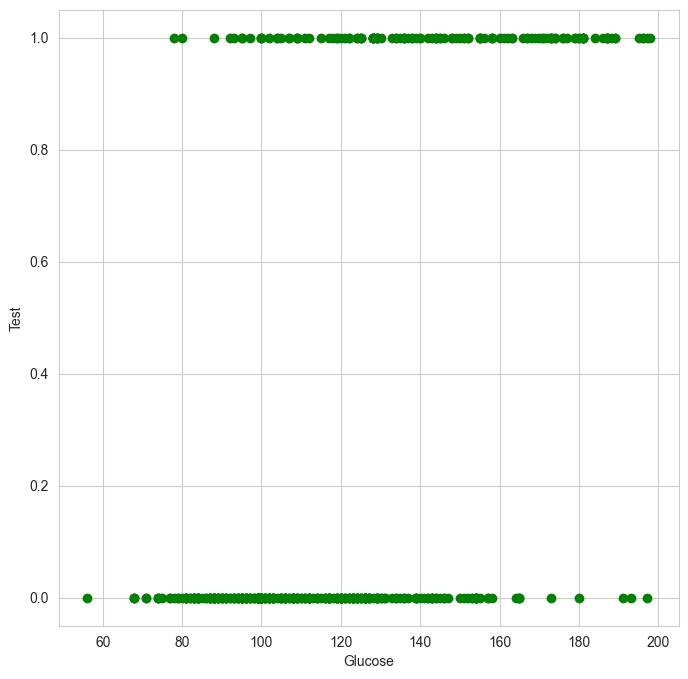

In [11]:
plt.figure(figsize=(8, 8))

plt.scatter(diabetes_data['glucose'], diabetes_data['test'], c='g')

plt.xlabel('Glucose')
plt.ylabel('Test')

plt.show()

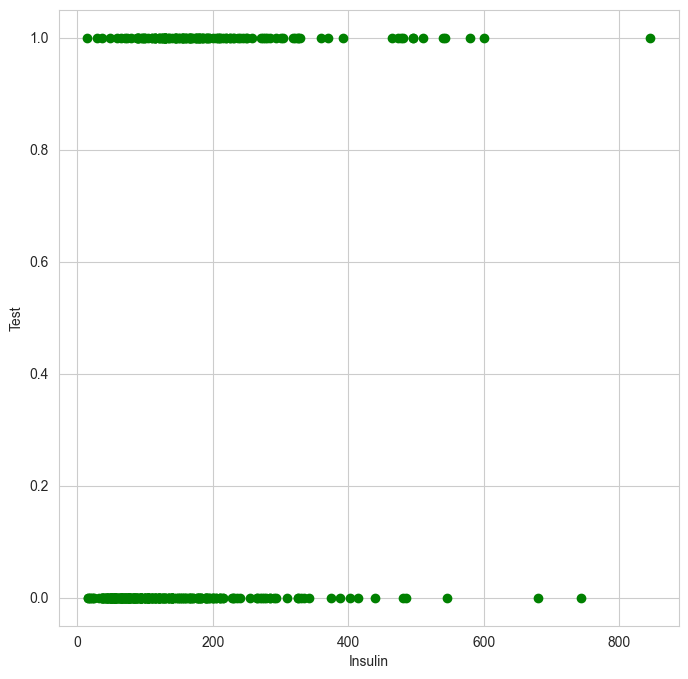

In [12]:
plt.figure(figsize=(8, 8))

plt.scatter(diabetes_data['insulin'], diabetes_data['test'], c='g')

plt.xlabel('Insulin')
plt.ylabel('Test')

plt.show()

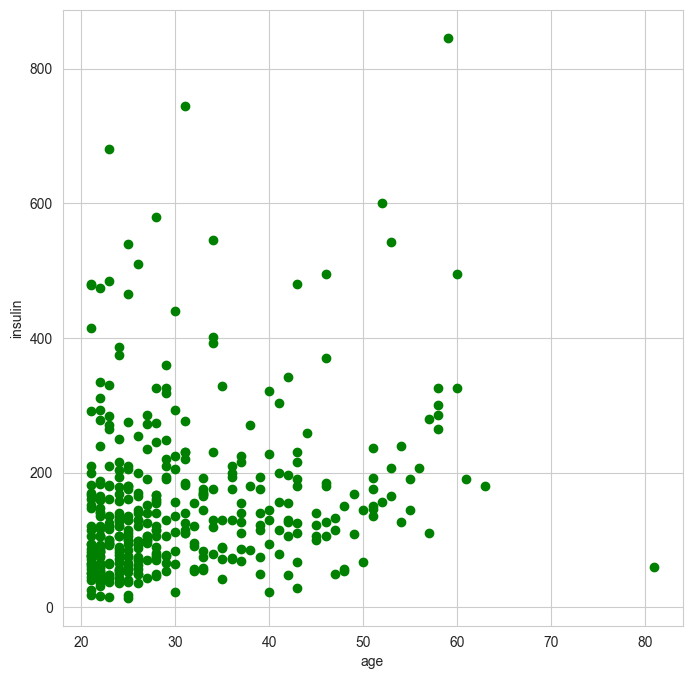

In [13]:
plt.figure(figsize=(8, 8))

plt.scatter(diabetes_data['age'], diabetes_data['insulin'], c='g')

plt.xlabel('age')
plt.ylabel('insulin')

plt.show()

In [14]:
diabetes_data_correlation = diabetes_data.corr()

diabetes_data_correlation

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
pregnant,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
diastolic,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
triceps,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
bmi,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
diabetes,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
test,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


<Axes: >

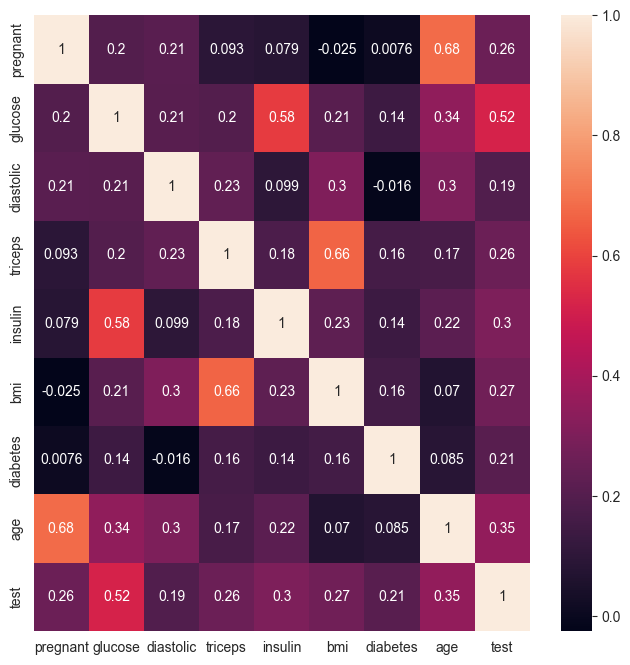

In [15]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(diabetes_data_correlation, annot=True)

In [16]:
features = diabetes_data.drop('test', axis=1)

features.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
0,1,89,66,23,94,28.1,0.167,21
1,0,137,40,35,168,43.1,2.288,33
2,3,78,50,32,88,31.0,0.248,26
3,2,197,70,45,543,30.5,0.158,53
4,1,189,60,23,846,30.1,0.398,59


In [17]:
features.describe()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [18]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()

In [19]:
features_scaled = standard_scaler.fit_transform(features)

features_scaled.shape

(392, 8)

In [20]:
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

features_scaled_df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668


In [21]:
features_scaled_df.describe()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-9.063045e-18,1.132881e-17,-4.531523e-16,1.087565e-16,1.064908e-16,1.631348e-16,1.812609e-17,1.110223e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.029213e+00,-2.161731e+00,-3.739001e+00,-2.108484e+00,-1.196867e+00,-2.120941e+00,-1.269525e+00,-9.682991e-01
25%,-7.174265e-01,-7.665958e-01,-6.941640e-01,-7.755315e-01,-6.681786e-01,-6.676780e-01,-7.340909e-01,-7.719850e-01
50%,-4.056403e-01,-1.176959e-01,-5.314565e-02,-1.384444e-02,-2.574448e-01,1.621036e-02,-2.131475e-01,-3.793569e-01
75%,5.297185e-01,6.609841e-01,5.878727e-01,7.478426e-01,2.859877e-01,5.718696e-01,4.751644e-01,5.040564e-01
max,4.271153e+00,2.445459e+00,3.151946e+00,3.223325e+00,5.812990e+00,4.846172e+00,5.497667e+00,4.921123e+00


In [22]:
diabetes_data = pd.concat([features_scaled_df, diabetes_data['test']], axis=1).reset_index(drop=True)

diabetes_data.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,0
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1


### Saving the processed data in csv format

In [23]:
diabetes_data.to_csv('dataset/PimaIndians_processed.csv', index=False)

In [24]:
!ls dataset

Advertising.csv           PimaIndians_processed.csv insurance.csv
PimaIndians.csv           driver_dataset.csv        insurance_processed.csv


In [25]:
from sklearn.model_selection import train_test_split

X = diabetes_data.drop('test', axis=1)
Y = diabetes_data['test']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [27]:
x_train.shape, y_train.shape

((274, 8), (274,))

In [28]:
x_test.shape, y_test.shape

((118, 8), (118,))

### Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#### Train the model for predicting the test result ( pos or neg)

In [29]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

classifier.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [54]:
# For recording: First do the Logistic regression, then just paste this in and shift-enter the rest
# from sklearn.tree import DecisionTreeClassifier

# classifier = DecisionTreeClassifier(max_depth=4)

# classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
y_pred = classifier.predict(x_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1])

In [31]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

pred_results.head(10)

,y_test,y_pred
334,0,0
37,1,0
90,1,0
328,0,0
230,0,0
11,1,0
192,0,0
241,0,1
12,0,0
301,1,0


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

### Accuracy Score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

### Precision Score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

### Recall Score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [33]:
model_accuracy = accuracy_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)

print("Accuracy of the model is {}% " .format( model_accuracy * 100))
print("Precision of the model is {}% " .format(model_precision * 100))
print("Recall of the model is {}% " .format(model_recall * 100))

Accuracy of the model is 72.88135593220339% 
Precision of the model is 72.41379310344827% 
Recall of the model is 46.666666666666664% 


In [34]:
diabetes_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

diabetes_crosstab

y_test,0,1
y_pred,,
0,65,24
1,8,21


In [40]:
TP = diabetes_crosstab[1][1]
TN = diabetes_crosstab[0][0]
FP = diabetes_crosstab[0][1]
FN = diabetes_crosstab[1][0]

print("True Positives: ", TP)
print("True Negatives: ", TN)
print("False Positives: ", FP)
print("False Negatives: ", FN)


True Positives:  21
True Negatives:  65
False Positives:  8
False Negatives:  24


In [42]:
accuracy_score_verified = (TP + TN) / (TP + FP + TN + FN)

accuracy_score_verified

np.float64(0.7288135593220338)

In [39]:
precision_score_survived = TP / (TP + FP)

precision_score_survived

np.float64(0.7241379310344828)

In [43]:
recall_score_survived = TP / (TP + FN)

recall_score_survived

np.float64(0.4666666666666667)